In [1]:
# PACKAGES & SETTINGS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from my_funcs import show_data_overview, show_vegetable_overview, show_n_by_col

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [2]:
# READ IN DATA
harvest_df = pd.read_csv("harvest_2020.csv")

In [3]:
# DATA OVERVIEW
print(show_data_overview(harvest_df))
# print(harvest_df[harvest_df["vegetable"] == "apple"])


There are 781 rows and 5 columns in the dataframe.

Here is a quick view of the data in the dataframe:
  vegetable           variety        date  weight  units
0   lettuce            reseed  2020-06-06      20  grams
1    radish  Garden Party Mix  2020-06-06      36  grams
2   lettuce            reseed  2020-06-08      15  grams
3   lettuce            reseed  2020-06-09      10  grams
4    radish  Garden Party Mix  2020-06-11      67  grams

And here are the summary statistics:
       vegetable variety        date       weight  units
count        781     781         781   781.000000    781
unique        31      64         114          NaN      1
top     tomatoes   grape  2020-09-19          NaN  grams
freq         263      39          45          NaN    781
mean         NaN     NaN         NaN   553.463508    NaN
std          NaN     NaN         NaN   825.441737    NaN
min          NaN     NaN         NaN     2.000000    NaN
25%          NaN     NaN         NaN    94.000000    NaN
50%

---
# IN-DEPTH EDA
---

In [7]:
## Harvest Frequency by Vegetable
harvest_count_df = harvest_df.groupby(["vegetable"])["date"].count().reset_index().rename(columns= {'date':'harvest frequency'})
top_n_freq, bottom_n_freq = show_n_by_col(harvest_count_df, "harvest frequency", 5, 5)

print(top_n_freq)
print("\n")
print(bottom_n_freq)

   vegetable  harvest frequency
29  tomatoes                263
17   lettuce                 69
4      beans                 38
30  zucchini                 37
27    squash                 34


    vegetable  harvest frequency
1       apple                  1
2   asparagus                  1
8      chives                  1
16   kohlrabi                  1
9    cilantro                  3


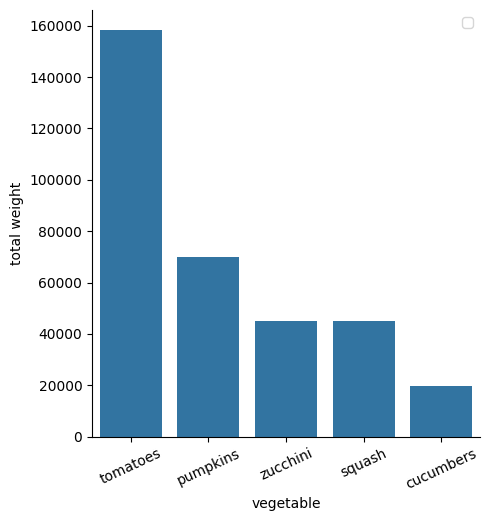

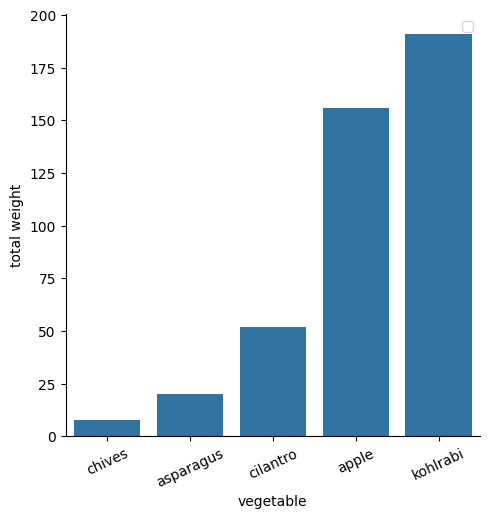

In [5]:
## Vegetable Productivity by Harvest Weight
harvest_weight_sum_df = harvest_df.groupby(["vegetable"])["weight"].sum().reset_index().rename(columns= {'weight':'total weight'})
top_n_weight, bottom_n_weight = show_n_by_col(harvest_weight_sum_df, "total weight", 5, 5)

# sorted_harvest_df_top = harvest_weight_sum_df.sort_values(by=["total weight"], ascending=False)[0:5]
# sorted_harvest_df_bottom = grouped_harvest_df.sort_values(by=["total weight"], ascending=True)[0:5]

sns.catplot(data=top_n_weight, x="vegetable", y="total weight", kind='bar', errorbar=None, legend_out=False)
plt.xticks(rotation=25)
plt.show()
plt.clf()
plt.close()

sns.catplot(data=bottom_n_weight, x="vegetable", y="total weight", kind='bar', errorbar=None, legend_out=False)
plt.xticks(rotation=25)
plt.show()
plt.clf()
plt.close()

In [6]:
## Vegetable Variety Productivity by Harvest Weight
unique_vegetables = harvest_df["vegetable"].unique() #.astype(str).tolist()
veg_dict = dict.fromkeys(unique_vegetables)

for vegetable in unique_vegetables:
    veg_list = harvest_df.loc[harvest_df["vegetable"] == vegetable]
    grouped_veg_var = veg_list.groupby(["variety"])["weight"].sum().reset_index().rename(columns= {'weight':'total weight'})
    veg_dict[vegetable] = grouped_veg_var.sort_values(by=["total weight"], ascending=False)[0:5]

print(unique_vegetables)
show_vegetable_overview(veg_dict)

['lettuce' 'radish' 'spinach' 'beets' 'kale' 'peas' 'chives'
 'strawberries' 'asparagus' 'Swiss chard' 'cilantro' 'basil' 'raspberries'
 'zucchini' 'beans' 'cucumbers' 'tomatoes' 'onions' 'jalapeño'
 'hot peppers' 'carrots' 'peppers' 'broccoli' 'potatoes' 'edamame' 'corn'
 'pumpkins' 'squash' 'kohlrabi' 'apple' 'rutabaga']


What vegetable are you interested in?
 lettuce


,variety,total weight
1,Lettuce Mixture,2154
0,Farmer's Market Blend,1725
2,Tatsoi,1313
4,reseed,45
3,mustard greens,23
